In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL2dlc3Rpb25fYWN0aWZz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_33496/1683896823.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
# ! pip install yfinance
from datetime import datetime, timedelta
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [3]:
def get_data(start_date, end_date, index_ticker, tickers, column="Close"):
    """
    Extraction de données de cours d'actions
    Args:
        start_date (str): Date de début au format 'YYYY-MM-DD'.
        end_date (str): Date de fin au format 'YYYY-MM-DD'.

    Returns:
        dict: Contient les prix historiques des indices
    """
    # Extraction des volumes historiques des composants
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust =True)[column]

    # Extraction des volumes historiques de l'indice CAC 40
    index = yf.download(index_ticker, start=start_date, end=end_date, auto_adjust =True)[column]

    return {
        "portfolio_data": data,
        "benchmark_data": index,
    }

end_date = datetime.now()
start_date = end_date - timedelta(days=3*31)

selected_assets = {
    "AC.PA": "Accor",
    "AI.PA": "Air Liquide",
    "AIR.PA": "Airbus",
    "MT.AS": "ArcelorMittal",
    "CS.PA": "AXA",
    "BNP.PA": "BNP Paribas",
    "EN.PA": "Bouygues",
    "BVI.PA": "Bureau Veritas",
    "CAP.PA": "Capgemini",
    "CA.PA": "Carrefour",
    "ACA.PA": "Crédit Agricole",
    "BN.PA": "Danone",
    "DSY.PA": "Dassault Systèmes",
    "EDEN.PA": "Edenred",
    "ENGI.PA": "Engie",
    "EL.PA": "EssilorLuxottica",
    "ERF.PA": "Eurofins Scientific",
    "RMS.PA": "Hermès",
    "KER.PA": "Kering",
    "LR.PA": "Legrand",
    "OR.PA": "L'Oréal",
    "MC.PA": "LVMH",
    "ML.PA": "Michelin",
    "ORA.PA": "Orange",
    "RI.PA": "Pernod Ricard",
    "PUB.PA": "Publicis",
    "RNO.PA": "Renault",
    "SAF.PA": "Safran",
    "SGO.PA": "Saint-Gobain",
    "SAN.PA": "Sanofi",
    "SU.PA": "Schneider Electric",
    "GLE.PA": "Société Générale",
    "STLA": "Stellantis",
    "STMPA.PA": "STMicroelectronics",
    "TEP.PA": "Teleperformance",
    "HO.PA": "Thales",
    "TTE.PA": "TotalEnergies",
    "UNBLF": "Unibail-Rodamco-Westfield",
    "VIE.PA": "Veolia",
    "DG.PA": "Vinci",
}

index = "^FCHI"

assets_ticker  = list(selected_assets.keys())

data = get_data(start_date,end_date, index, assets_ticker, column="Volume")

[                       0%                       ]

[**                     5%                       ]  2 of 40 completed

[******                12%                       ]  5 of 40 completed

[******                12%                       ]  5 of 40 completed

[******                12%                       ]  5 of 40 completed

[**********            20%                       ]  8 of 40 completed

[***********           22%                       ]  9 of 40 completed

[*************         28%                       ]  11 of 40 completed

[*************         28%                       ]  11 of 40 completed

[***************       32%                       ]  13 of 40 completed

[*****************     35%                       ]  14 of 40 completed

[******************    38%                       ]  15 of 40 completed

[*******************   40%                       ]  16 of 40 completed

[********************  42%                       ]  17 of 40 completed

[**********************48%                       ]  19 of 40 completed

[**********************50%                       ]  20 of 40 completed

[**********************55%*                      ]  22 of 40 completed

[**********************57%**                     ]  23 of 40 completed

[**********************57%**                     ]  23 of 40 completed

[**********************62%*****                  ]  25 of 40 completed

[**********************65%******                 ]  26 of 40 completed

[**********************70%*********              ]  28 of 40 completed

[**********************75%***********            ]  30 of 40 completed

[**********************75%***********            ]  30 of 40 completed

[**********************80%*************          ]  32 of 40 completed

[**********************82%**************         ]  33 of 40 completed

[**********************82%**************         ]  33 of 40 completed

[**********************88%*****************      ]  35 of 40 completed

[**********************90%******************     ]  36 of 40 completed

[**********************92%*******************    ]  37 of 40 completed

[**********************95%*********************  ]  38 of 40 completed

[*********************100%***********************]  40 of 40 completed

[*********************100%***********************]  1 of 1 completed

In [4]:
portfolio_data = data["portfolio_data"]
portfolio_data.head()

Ticker,AC.PA,ACA.PA,AI.PA,AIR.PA,BN.PA,BNP.PA,BVI.PA,CA.PA,CAP.PA,CS.PA,...,SAF.PA,SAN.PA,SGO.PA,STLA,STMPA.PA,SU.PA,TEP.PA,TTE.PA,UNBLF,VIE.PA
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-09,443660.0,7274406.0,627374.0,1091176.0,1084594.0,3643529.0,568210.0,1879261.0,584078.0,3658094.0,...,751497.0,1250170.0,1123733.0,10853300.0,2766842.0,775183.0,190172.0,4923269.0,0.0,1553302.0
2024-12-10,390915.0,4390055.0,750778.0,1411830.0,937150.0,3017820.0,798625.0,1753947.0,538337.0,4791301.0,...,756782.0,1455141.0,1010553.0,12271800.0,2754581.0,929142.0,207821.0,5329581.0,300.0,1567864.0
2024-12-11,482166.0,5463916.0,640048.0,931725.0,1057111.0,1806949.0,1473254.0,1751080.0,477627.0,3225022.0,...,598249.0,1246198.0,706606.0,8752900.0,1938949.0,702050.0,187732.0,5966852.0,100.0,1259880.0
2024-12-12,710558.0,4035606.0,563489.0,1077016.0,908350.0,3064965.0,774731.0,1811254.0,605225.0,2852315.0,...,515921.0,1556573.0,664396.0,5588900.0,1650890.0,688202.0,170759.0,4771486.0,100.0,1784921.0
2024-12-13,572346.0,3069457.0,526947.0,1388272.0,1033859.0,2159456.0,587186.0,2683047.0,624709.0,3877128.0,...,464727.0,2193760.0,689639.0,9559800.0,1506707.0,620722.0,173369.0,4275545.0,100.0,1171242.0


In [5]:
portfolio_data.index

DatetimeIndex(['2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24',
               '2024-12-26', '2024-12-27', '2024-12-30', '2024-12-31',
               '2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
               '2025-01-08', '2025-01-09', '2025-01-10', '2025-01-13',
               '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17',
               '2025-01-20', '2025-01-21', '2025-01-22', '2025-01-23',
               '2025-01-24', '2025-01-27', '2025-01-28', '2025-01-29',
               '2025-01-30', '2025-01-31', '2025-02-03', '2025-02-04',
               '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-10',
               '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
               '2025-02-17', '2025-02-18', '2025-02-19', '2025-02-20',
               '2025-02-21', '2025-02-24', '2025-02-25', '2025-02-26',
      

In [6]:
# Calcul des ADV 3Mois

adv_3m = {portfolio_data[ticker].mean() for ticker in assets_ticker}
adv_3m

ADV = pd.DataFrame(adv_3m, index = assets_ticker, columns = ["ADV"])
ADV.head()

,ADV
AC.PA,2.757892e+06
AI.PA,2.888069e+06
AIR.PA,1.041545e+06
MT.AS,5.821968e+06
CS.PA,8.395716e+05


In [7]:
# Génération des quantités
np.random.seed(123)
ADV["Quantity"] =  round(1.5 * np.random.rand(len(ADV["ADV"])) * ADV["ADV"])
ADV.head()

,ADV,Quantity
AC.PA,2.757892e+06,2881180.0
AI.PA,2.888069e+06,1239585.0
AIR.PA,1.041545e+06,354414.0
MT.AS,5.821968e+06,4814605.0
CS.PA,8.395716e+05,906069.0


In [8]:
market_depth = 20/100
ADV["Quantity in 1day"] = round(ADV["Quantity"] * market_depth)
ADV.head()

,ADV,Quantity,Quantity in 1day
AC.PA,2.757892e+06,2881180.0,576236.0
AI.PA,2.888069e+06,1239585.0,247917.0
AIR.PA,1.041545e+06,354414.0,70883.0
MT.AS,5.821968e+06,4814605.0,962921.0
CS.PA,8.395716e+05,906069.0,181214.0


In [9]:
# Calcul du nombre de jours de liquidation
ADV["Days of liquidation"] = ADV["Quantity"]/ADV["Quantity in 1day"]

# floor to 1 and round
ADV["Days of liquidation"] = ADV["Days of liquidation"].apply(lambda x: max(1, round(x)))
ADV.head()

,ADV,Quantity,Quantity in 1day,Days of liquidation
AC.PA,2.757892e+06,2881180.0,576236.0,5
AI.PA,2.888069e+06,1239585.0,247917.0,5
AIR.PA,1.041545e+06,354414.0,70883.0,5
MT.AS,5.821968e+06,4814605.0,962921.0,5
CS.PA,8.395716e+05,906069.0,181214.0,5


In [10]:
print(f"Temps de liquidation du portefeuille : {ADV['Days of liquidation'].max()} jours")

Temps de liquidation du portefeuille : 5 jours


In [11]:
# Initialisation d'une colonne pour suivre les quantités liquidées
ADV["Quantity liquidated"] = 0  # Initialement, rien n'est liquidé

# Création d'une liste pour suivre la liquidation jour par jour
# Au jour 0, on a liquidé 0. La colonne 0 sert de quantité initiale
quantity_liquidated_per_day = [ADV["Quantity"]]

for nb_day in range(1, 8):  # Pour chaque jour
    # Calculer la quantité liquide au jour i
    liquidated_today = np.minimum(ADV["Quantity in 1day"], ADV["Quantity"] - ADV["Quantity liquidated"])
    
    # Mettre à jour les quantités liquidées dans le DataFrame
    ADV["Quantity liquidated"] += liquidated_today
    
    # Stocker les quantités liquidées ce jour dans une liste
    quantity_liquidated_per_day.append(liquidated_today)

# Conversion des résultats jour par jour en DataFrame pour plus de clarté
liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]

liquidation_df.head()

,0,1,2,3,4,5,6,7
AC.PA,2881180.0,576236.0,576236.0,576236.0,576236.0,576236.0,0.0,0.0
AI.PA,1239585.0,247917.0,247917.0,247917.0,247917.0,247917.0,0.0,0.0
AIR.PA,354414.0,70883.0,70883.0,70883.0,70883.0,70882.0,0.0,0.0
MT.AS,4814605.0,962921.0,962921.0,962921.0,962921.0,962921.0,0.0,0.0
CS.PA,906069.0,181214.0,181214.0,181214.0,181214.0,181213.0,0.0,0.0


In [12]:
end_date = datetime.now()
start_date = end_date - timedelta(days=1)
price_data = get_data(start_date, end_date, index, assets_ticker, column="Close")

price_data["portfolio_data"].head()
price_dict = price_data["portfolio_data"].iloc[-1].to_dict()

[                       0%                       ]

[****                   8%                       ]  3 of 40 completed

[*********             18%                       ]  7 of 40 completed

[**********            20%                       ]  8 of 40 completed

[***********           22%                       ]  9 of 40 completed

[************          25%                       ]  10 of 40 completed

[************          25%                       ]  10 of 40 completed

[**************        30%                       ]  12 of 40 completed

[*****************     35%                       ]  14 of 40 completed

[*******************   40%                       ]  16 of 40 completed

[********************  42%                       ]  17 of 40 completed

[**********************45%                       ]  18 of 40 completed

[**********************45%                       ]  18 of 40 completed

[**********************55%*                      ]  22 of 40 completed

[**********************57%**                     ]  23 of 40 completed

[**********************60%****                   ]  24 of 40 completed

[**********************60%****                   ]  24 of 40 completed

[**********************65%******                 ]  26 of 40 completed

[**********************70%*********              ]  28 of 40 completed

[**********************70%*********              ]  28 of 40 completed

[**********************80%*************          ]  32 of 40 completed

[**********************82%**************         ]  33 of 40 completed

[**********************82%**************         ]  33 of 40 completed

[**********************88%*****************      ]  35 of 40 completed

[**********************92%*******************    ]  37 of 40 completed

[**********************95%*********************  ]  38 of 40 completed

[*********************100%***********************]  40 of 40 completed



1 Failed download:


['UNBLF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-03-09 22:56:13.838275 -> 2025-03-10 22:56:13.838275)')


[*********************100%***********************]  1 of 1 completed

In [13]:
# Valeur liquide des actions par jour de liquidation
market_value =[
    price_dict[ticker] * liquidation_df.loc[ticker]
    for ticker in selected_assets
]

market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
market_value.head()

,0,1,2,3,4,5,6,7
AC.PA,1.323326e+08,2.646652e+07,2.646652e+07,2.646652e+07,2.646652e+07,2.646652e+07,0.0,0.0
AI.PA,2.271663e+08,4.543327e+07,4.543327e+07,4.543327e+07,4.543327e+07,4.543327e+07,0.0,0.0
AIR.PA,5.781201e+07,1.156243e+07,1.156243e+07,1.156243e+07,1.156243e+07,1.156227e+07,0.0,0.0
MT.AS,1.397680e+08,2.795360e+07,2.795360e+07,2.795360e+07,2.795360e+07,2.795360e+07,0.0,0.0
CS.PA,3.490178e+07,6.980363e+06,6.980363e+06,6.980363e+06,6.980363e+06,6.980325e+06,0.0,0.0


In [14]:
# Calcul de la valeur de marché initiale et totale
market_value_0 = market_value.iloc[:, 0]
total_market_value_0 = market_value_0.sum()

# Calcul de la valeur de marché cumulée (à partir de la colonne 1)
cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

weights = {}
for ticker in assets_ticker :
    weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

weights = pd.DataFrame(weights).T
weights.head()

,0,1,2,3,4,5,6,7
AC.PA,0.022018,0.022018,0.022018,0.022018,0.022017,0.0,NaN,NaN
AI.PA,0.037796,0.037796,0.037796,0.037796,0.037796,0.0,NaN,NaN
AIR.PA,0.009619,0.009619,0.009619,0.009619,0.009619,0.0,NaN,NaN
MT.AS,0.023255,0.023255,0.023255,0.023255,0.023255,0.0,NaN,NaN
CS.PA,0.005807,0.005807,0.005807,0.005807,0.005807,0.0,NaN,NaN


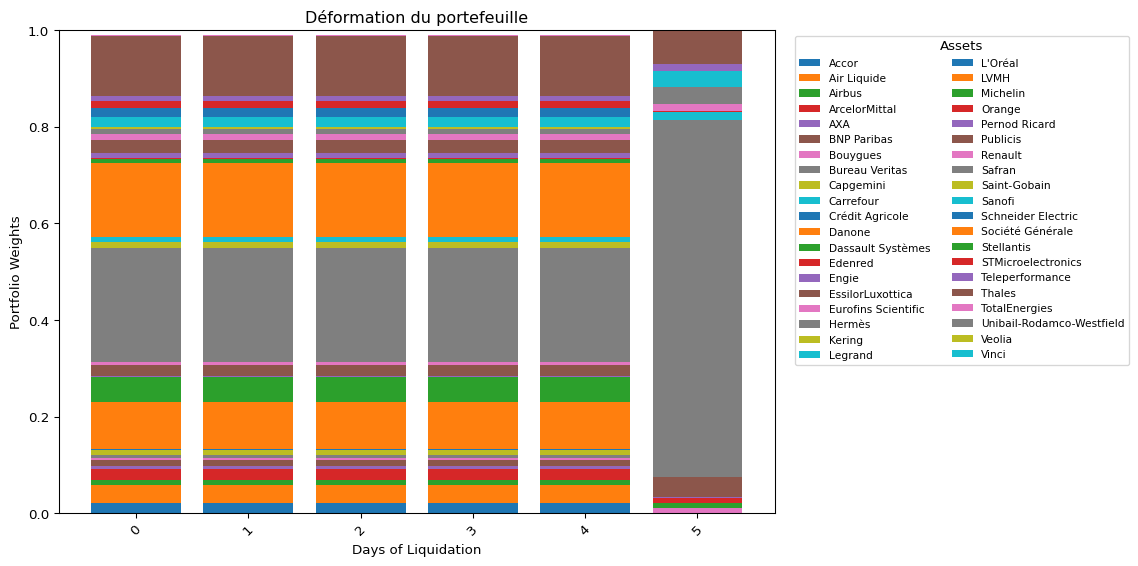

In [15]:
# Initialiser le graphique
plt.figure(figsize=(12, 6))

# Barplot empilé
bottom = None
for asset in weights.index:
    plt.bar(
        pd.to_numeric(weights.columns),  # Les jours
        weights.loc[asset],  # Poids de l'actif pour chaque jour
        bottom=bottom,  # Position de départ pour empiler les barres
        label=selected_assets[asset]  # Légende pour chaque actif
    )
    bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

plt.xlabel("Days of Liquidation")
plt.ylabel("Portfolio Weights")
plt.title("Déformation du portefeuille")
plt.xticks(rotation=45)
plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
plt.tight_layout()

plt.show()

In [16]:
# Valeur liquide du portefeuille
market_value_df = pd.DataFrame()

market_value_df["market_value"] = market_value.sum(axis=0)

# Calculer la valeur liquide relative par rapport au jour 0
market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]

# Calculer la valeur cumulée liquide relative du portefeuille
market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1

# Afficher le DataFrame résultant
print(market_value_df)

   market_value  relative value  cumulative value
0  6.010327e+09        1.000000          0.000000
1  1.202064e+09        0.200000          0.200000
2  1.202064e+09        0.200000          0.400000
3  1.202064e+09        0.200000          0.600000
4  1.202064e+09        0.200000          0.799999
5  1.202062e+09        0.200000          0.999999
6  6.753130e+03        0.000001          1.000000
7  0.000000e+00        0.000000          1.000000


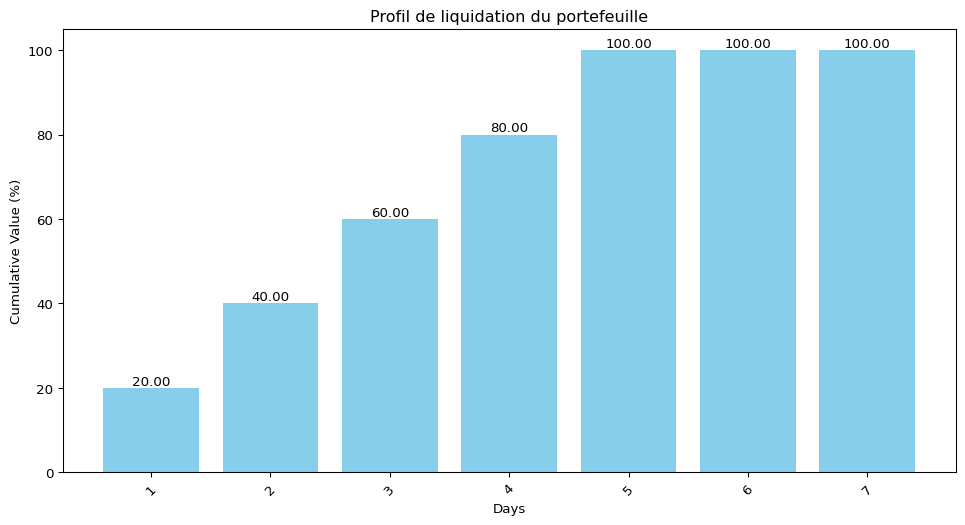

In [17]:
import matplotlib.pyplot as plt
market_value_df = market_value_df.iloc[1:]

plt.figure(figsize=(12, 6))
bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text
        height,  # Position slightly above the bar
        f'{height:.2f}',  # Format with 2 decimal places
        ha='center',  # Center horizontally
        va='bottom',  # Position text at the bottom
        fontsize=10, color="black"
    )

# Set labels and title
plt.xlabel("Days")
plt.ylabel("Cumulative Value (%)")
plt.title("Profil de liquidation du portefeuille")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def liquidation_profile(ADV, price_dict, selected_assets, fact_modulation=0.30,nb_liquidation=8, plot_graphs=True):
    """
    Calcule le profil de liquidation et visualise les graphiques des poids et des valeurs cumulées.
    
    Parameters:
        ADV (pd.DataFrame): DataFrame contenant les informations sur les actifs (Quantity, Quantity in 1day, etc.).
        price_dict (dict): Dictionnaire avec les prix des actifs (clé = actif, valeur = prix).
        selected_assets (list): Liste des actifs sélectionnés.
        fact_modulation (float): Facteur de modulation pour ajuster les quantités.
        plot_graphs (bool): Indique si les graphiques doivent être affichés.
    
    Returns:
        pd.DataFrame: DataFrame contenant les valeurs cumulées et relatives.
    """
    # Initialisation des quantités liquidées
    ADV = ADV.copy()
    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"] * fact_modulation]
    
    # Calcul des quantités liquidées par jour
    for _ in range(1, nb_liquidation+1):
        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] * fact_modulation - ADV["Quantity liquidated"]
        )
        ADV["Quantity liquidated"] += liquidated_today
        quantity_liquidated_per_day.append(liquidated_today)
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    # Calcul des poids par jour
    # Calcul de la valeur de marché initiale et totale
    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T
    
    # Visualisation des poids (barplot empilé)
    if plot_graphs:
        # Initialiser le graphique
        plt.figure(figsize=(12, 6))

        # Barplot empilé
        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns),  # Les jours
                weights.loc[asset],  # Poids de l'actif pour chaque jour
                bottom=bottom,  # Position de départ pour empiler les barres
                label=selected_assets[asset]  # Légende pour chaque actif
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()

        plt.show()

    
    # Création du DataFrame des valeurs de marché
    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(8, 4))
        plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()
    return market_value_df, market_value, weights

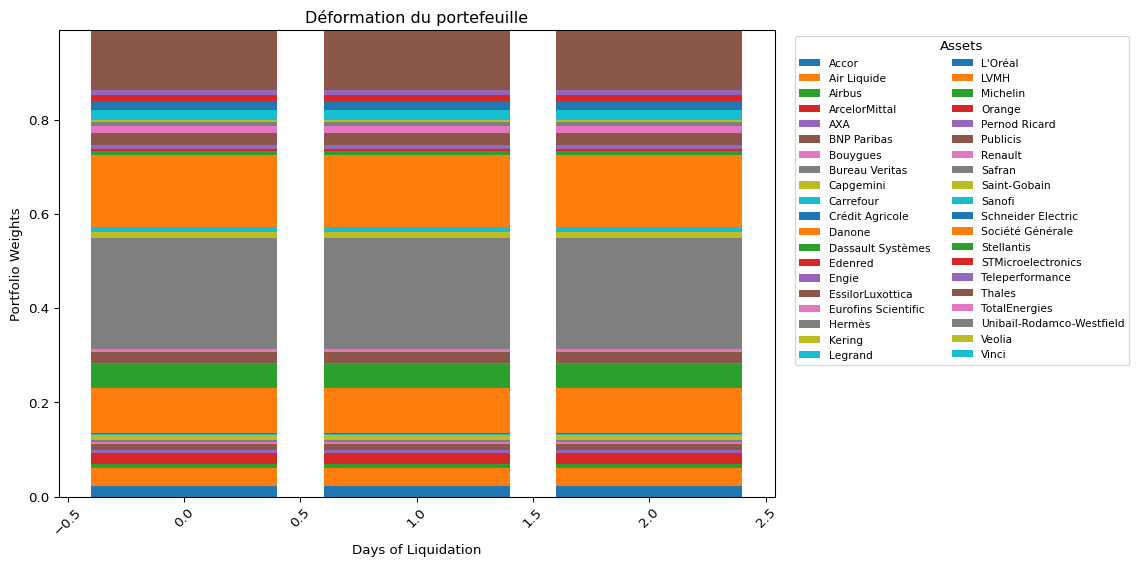

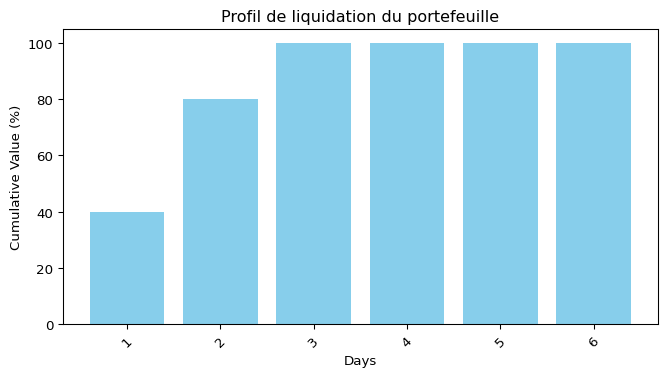

In [19]:
fact_modulation=0.5
nb_liquidation=6

new_market_value_df, new_market_value, new_weights = liquidation_profile(ADV, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)

In [20]:
new_market_value.head()

,0,1,2,3,4,5,6
AC.PA,6.616630e+07,2.646652e+07,2.646652e+07,1.323326e+07,0.0,0.0,0.0
AI.PA,1.135832e+08,4.543327e+07,4.543327e+07,2.271663e+07,0.0,0.0,0.0
AIR.PA,2.890600e+07,1.156243e+07,1.156243e+07,5.781136e+06,0.0,0.0,0.0
MT.AS,6.988399e+07,2.795360e+07,2.795360e+07,1.397680e+07,0.0,0.0,0.0
CS.PA,1.745089e+07,6.980363e+06,6.980363e+06,3.490162e+06,0.0,0.0,0.0


In [21]:
# Calcul des ADV 3Mois

adv_3m = {portfolio_data[ticker].mean() for ticker in assets_ticker}

ADV_stressed = pd.DataFrame(adv_3m, index = assets_ticker, columns = ["ADV"])

# Génération des quantités
np.random.seed(42)
ADV_stressed["Quantity"] =  round(1.5 * np.random.uniform(0, 1, size=len(ADV)) * ADV["ADV"])

# Quantité journalière
market_depth = (20/100)/2  # On stresse la liquidité
ADV_stressed["Quantity in 1day"] = round(ADV_stressed["Quantity"] * market_depth)

# Calcul du nombre de jours de liquidation
ADV_stressed["Days of liquidation"] = ADV_stressed["Quantity"]/ADV_stressed["Quantity in 1day"]

# floor to 1 and round
ADV_stressed["Days of liquidation"] = ADV_stressed["Days of liquidation"].apply(lambda x: max(1, round(x)))

print(f"Temps de liquidation du portefeuille : {ADV_stressed['Days of liquidation'].max()} jours")

Temps de liquidation du portefeuille : 10 jours


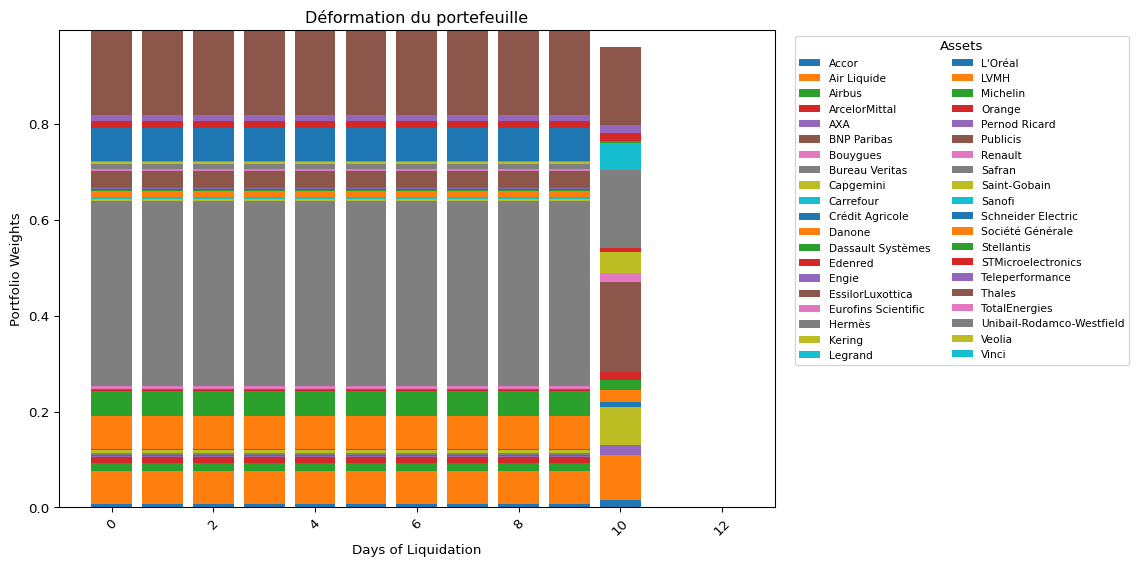

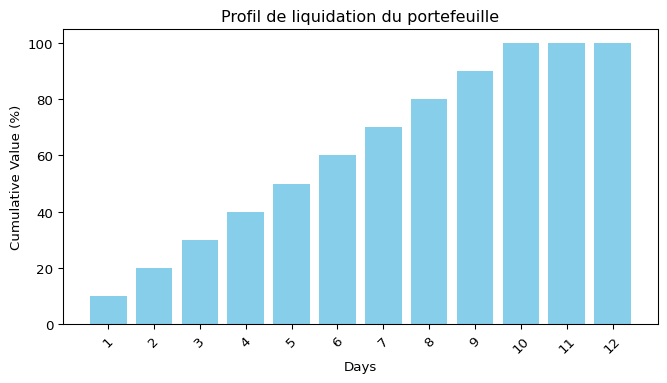

In [22]:
fact_modulation=1
nb_liquidation=12

stressed_market_value_df, stressed_market_value, stressed_weights = liquidation_profile(ADV_stressed, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def liquidation_profile_pro_forma(ADV, price_dict, selected_assets, fact_modulation=0.30,nb_liquidation=8, plot_graphs=True):
    """
    Calcule le profil de liquidation et visualise les graphiques des poids et des valeurs cumulées.
    
    Parameters:
        ADV (pd.DataFrame): DataFrame contenant les informations sur les actifs (Quantity, Quantity in 1day, etc.).
        price_dict (dict): Dictionnaire avec les prix des actifs (clé = actif, valeur = prix).
        selected_assets (list): Liste des actifs sélectionnés.
        fact_modulation (float): Facteur de modulation pour ajuster les quantités.
        plot_graphs (bool): Indique si les graphiques doivent être affichés.
    
    Returns:
        pd.DataFrame: DataFrame contenant les valeurs cumulées et relatives.
    """
    # Initialisation des quantités liquidées
    ADV = ADV.copy()
    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"] * fact_modulation]
    
    # Calcul des quantités liquidées par jour
    for _ in range(1, nb_liquidation+1):        
        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] * fact_modulation - ADV["Quantity liquidated"]
        )
        min_liquidated_today = (liquidated_today/ADV["Quantity in 1day"]).min() # On liquide à la vitesse de l'actif le moins liquide
        ADV["Quantity liquidated"] += min_liquidated_today*liquidated_today
        quantity_liquidated_per_day.append(liquidated_today)
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    # Calcul des poids par jour
    # Calcul de la valeur de marché initiale et totale
    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T
    
    # Visualisation des poids (barplot empilé)
    if plot_graphs:
        # Initialiser le graphique
        plt.figure(figsize=(12, 6))

        # Barplot empilé
        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns),  # Les jours
                weights.loc[asset],  # Poids de l'actif pour chaque jour
                bottom=bottom,  # Position de départ pour empiler les barres
                label=selected_assets[asset]  # Légende pour chaque actif
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()

        plt.show()

    
    # Création du DataFrame des valeurs de marché
    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(8, 4))
        plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()
    return market_value_df, market_value, weights

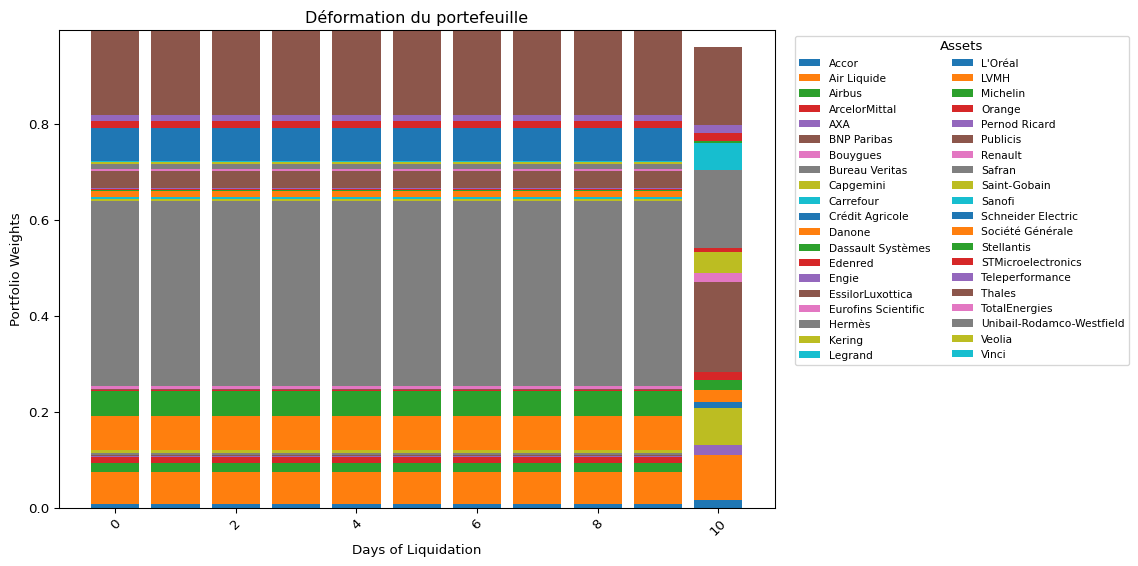

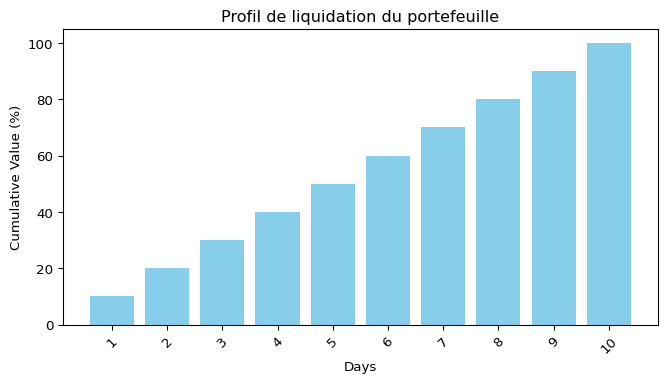

In [24]:
fact_modulation=1
nb_liquidation=10

stressed_market_value_df, stressed_market_value, stressed_weights = liquidation_profile_pro_forma(ADV_stressed, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)